# Tarea Unidad 2 
## Nombre: Yoamy de la Caridad Aguero Nocedo
## Título: Comparación de distintos espacios de color en imágenes digitales
## 1. BGR / RGB
## Definición breve:
* Son espacios de color basados en la combinación de los tres canales primarios: Azul (B), Verde (G) y Rojo (R).
* OpenCV usa BGR por defecto; Matplotlib y la mayoría de librerías visuales usan RGB.
## Usos prácticos:
* Visualización y manipulación básica de imágenes digitales.
* Punto de partida para convertir a otros espacios de color.
## Ejemplo:

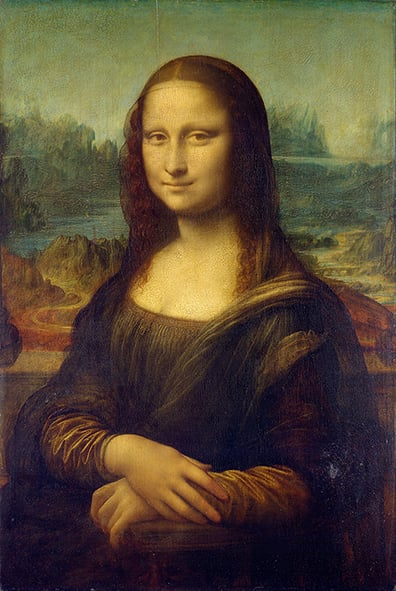

# Código: 
El código lee una imagen desde tu computadora, la convierte a formato RGB y la muestra correctamente usando Matplotlib.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
# Leer imagen de ejemplo (OpenCV la lee en formato BGR por defecto)
def load_image(path):
    """Lee la imagen y la convierte a formato RGB para mostrarla con Matplotlib"""
    bgr_img = cv2.imread(path)
    if bgr_img is None:
        raise FileNotFoundError(f"No se pudo leer la imagen: {path}")
    rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
    return bgr_img, rgb_img
 
# Cargar imagen de ejemplo (se asume que el archivo 1_Mona_Lisa_300ppi.jpg está en el directorio actual)
bgr_img, rgb_img = load_image("1_Mona_Lisa_300ppi.jpg")
plt.imshow(rgb_img)
plt.title("Imagen RGB original")
plt.axis("off")
plt.show()

## 2. Escala de Grises (Grayscale)
## Definición breve:
* Representa la intensidad luminosa de cada píxel mediante un solo canal (de 0 a 255).
* Se calcula como una combinación ponderada de R, G y B.
## Usos prácticos:
* Simplificación para análisis de bordes, detección de contornos o reconocimiento de patrones.
* Reducción de complejidad computacional en procesamiento de imágenes.


# Ejemplo:

# Código:
El código convierte una imagen a escala de grises de dos formas distintas, las muestra y verifica que los resultados sean equivalentes.

In [ ]:
def bgr_to_gray(bgr_img):
    """Conversión de BGR a imagen en escala de grises (dos métodos)"""
    # Método 1: función integrada de OpenCV (recomendado)
    gray_cv = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
   
    # Método 2: promedio ponderado manual (para verificar la implementación de OpenCV)
    b, g, r = cv2.split(bgr_img)
    gray_manual = np.uint8(0.299*r + 0.587*g + 0.0722*b)
   
    return gray_cv, gray_manual
 
# Conversión y visualización
gray_cv, gray_manual = bgr_to_gray(bgr_img)
 
# Mostrar comparación
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(rgb_img)
axes[0].set_title("Imagen RGB original")
axes[1].imshow(gray_cv, cmap="gray")
axes[1].set_title("Conversión a escala de grises (OpenCV)")
axes[2].imshow(gray_manual, cmap="gray")
axes[2].set_title("Conversión manual a escala de grises")
for ax in axes:
    ax.axis("off")
plt.tight_layout()
plt.show()
 
# Verificar consistencia entre ambos métodos
print(f"Diferencia entre los dos métodos: {np.sum(np.abs(gray_cv - gray_manual))}")  # El valor ideal es 0

## 3. HSV (Hue, Saturation, Value)
## Definición breve:
* Representa el color según su tono (Hue), saturación (S) y brillo (V).
* Se asemeja a la forma humana de percibir los colores.
## Usos prácticos:
* Segmentación por color (como la detección de objetos rojos en el código).
* Filtrado de colores bajo diferentes condiciones de iluminación.
* Detección de objetos o regiones específicas por tono.


# Ejemplo:

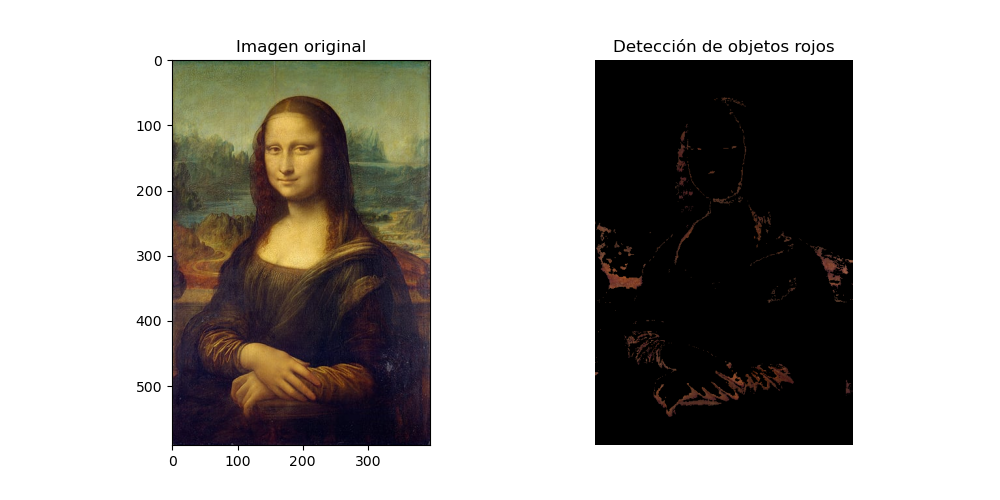

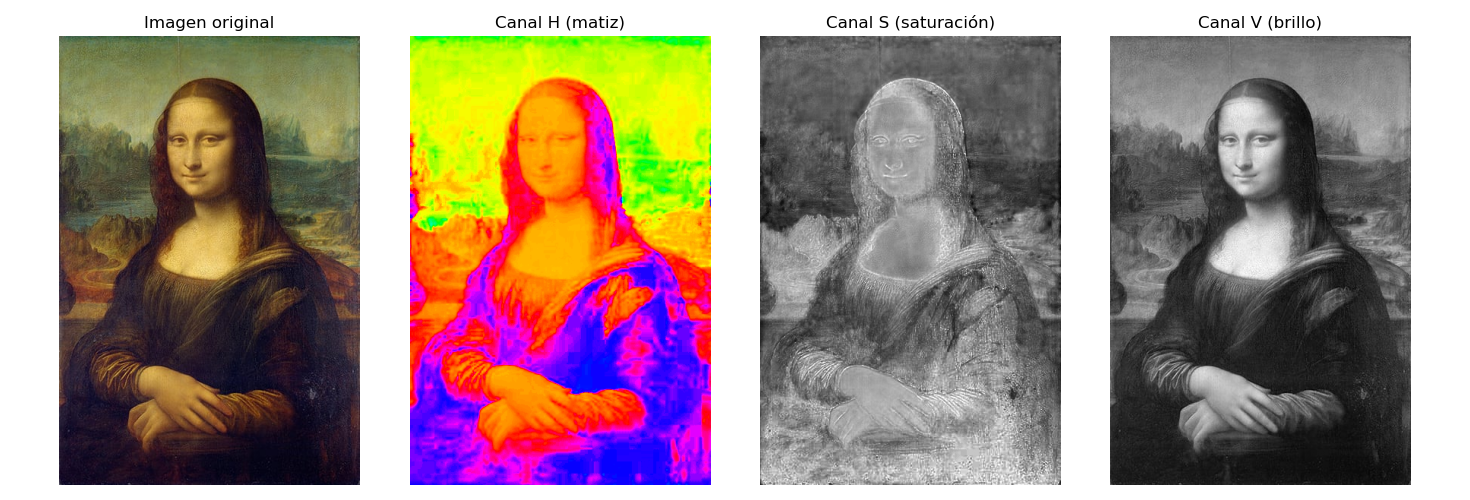

# Código:
* Muestra la imagen original junto a la imagen donde solo el color rojo ha sido detectado.
* El código convierte una imagen a HSV, muestra los canales H, S y V, y luego detecta las áreas de color rojo en la imagen.

In [ ]:
def bgr_to_hsv_demo(bgr_img):
    """Conversión a HSV y visualización de canales"""
    hsv_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv_img)
   
    # Visualizar los canales
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    axes[0].imshow(cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Imagen original")
    axes[1].imshow(h, cmap="hsv")
    axes[1].set_title("Canal H (matiz)")
    axes[2].imshow(s, cmap="gray")
    axes[2].set_title("Canal S (saturación)")
    axes[3].imshow(v, cmap="gray")
    axes[3].set_title("Canal V (brillo)")
    for ax in axes:
        ax.axis("off")
    plt.tight_layout()
    plt.show()
   
    # Ejemplo de segmentación en HSV (detección de objetos rojos)
    lower_red = np.array([0, 120, 70])
    upper_red = np.array([10, 255, 255])
    mask1 = cv2.inRange(hsv_img, lower_red, upper_red)
   
    lower_red2 = np.array([170, 120, 70])
    upper_red2 = np.array([180, 255, 255])
    mask2 = cv2.inRange(hsv_img, lower_red2, upper_red2)
   
    red_mask = mask1 + mask2
    result = cv2.bitwise_and(bgr_img, bgr_img, mask=red_mask)
   
    plt.figure(figsize=(10, 5))
    plt.subplot(121), plt.imshow(cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)), plt.title("Imagen original")
    plt.subplot(122), plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB)), plt.title("Detección de objetos rojos")
    plt.axis("off")
    plt.show()
 
bgr_to_hsv_demo(bgr_img)

## 4. Lab (CIE Lab*)
## Definición breve:
* Modelo perceptual que separa la luminancia (L*) del color (a*, b*).
* Se aproxima a la forma en que el ojo humano percibe las diferencias de color.
## Usos prácticos:
* Mejora de contraste o iluminación (ejemplo: uso de CLAHE en el canal L).
* Comparación precisa de colores (por ejemplo, medición de diferencias ΔE).
* Procesamiento avanzado en visión por computadora y retoque fotográfico.

# Ejemplo:

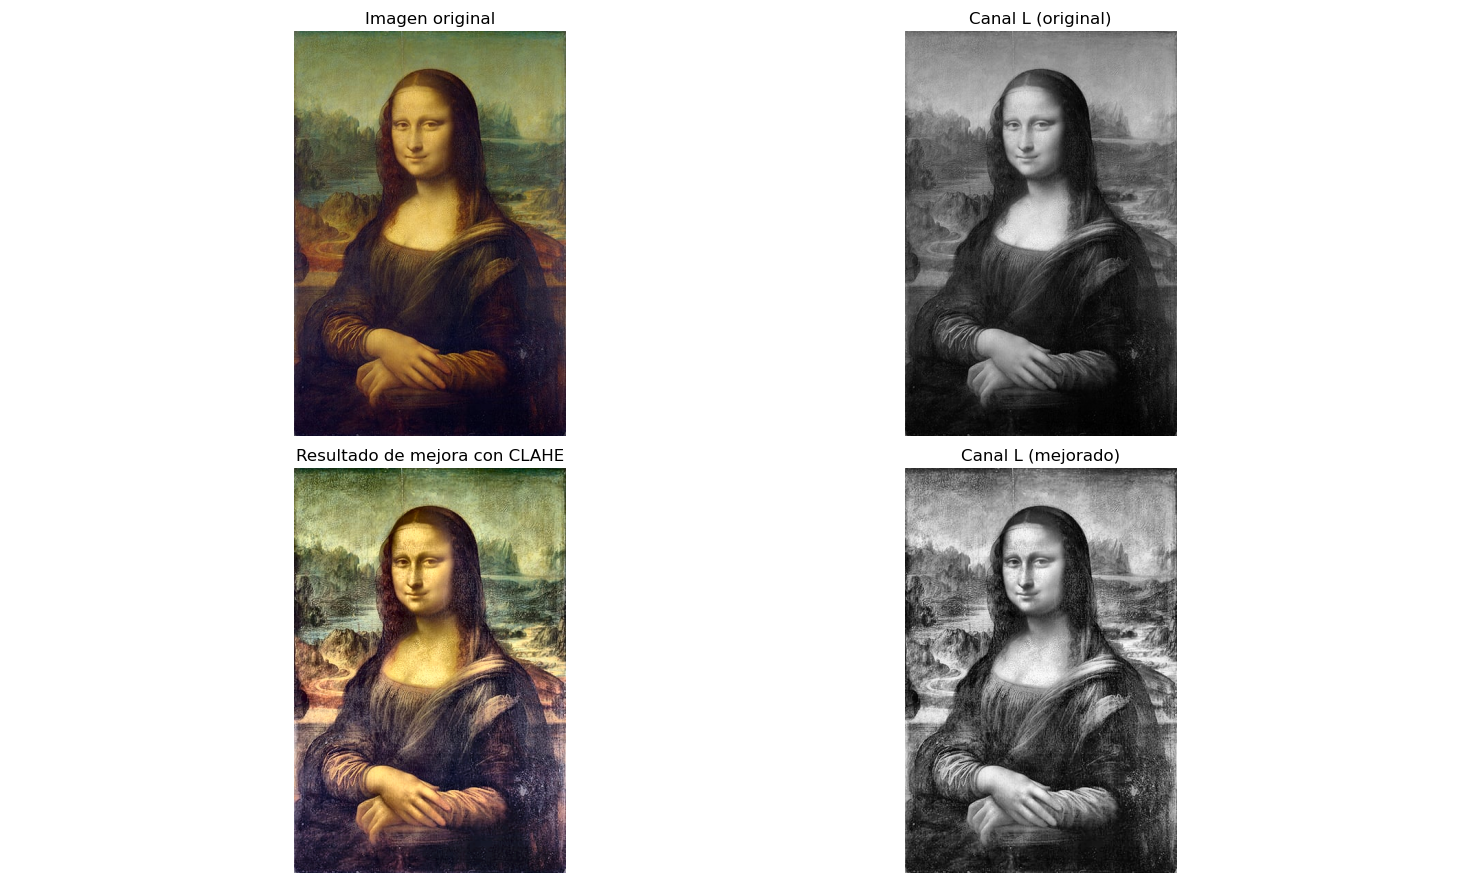

# Código:
El código convierte la imagen al espacio Lab, mejora el contraste del canal de luminosidad (L) con CLAHE, y muestra el antes y después para comparar los resultados.

In [ ]:
def bgr_to_lab_demo(bgr_img):
    """Conversión a espacio Lab y mejora de contraste"""
    lab_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab_img)
   
    # Aplicar CLAHE para mejorar el canal L
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    l_enhanced = clahe.apply(l)
    lab_enhanced = cv2.merge([l_enhanced, a, b])
    bgr_enhanced = cv2.cvtColor(lab_enhanced, cv2.COLOR_LAB2BGR)
   
    # Comparación visual
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes[0,0].imshow(cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB))
    axes[0,0].set_title("Imagen original")
    axes[0,1].imshow(l, cmap="gray")
    axes[0,1].set_title("Canal L (original)")
    axes[1,0].imshow(cv2.cvtColor(bgr_enhanced, cv2.COLOR_BGR2RGB))
    axes[1,0].set_title("Resultado de mejora con CLAHE")
    axes[1,1].imshow(l_enhanced, cmap="gray")
    axes[1,1].set_title("Canal L (mejorado)")
    for ax in axes.flatten():
        ax.axis("off")
    plt.tight_layout()
    plt.show()
 
bgr_to_lab_demo(bgr_img)

## 5. YCrCb
## Definición breve:
* Espacio utilizado en video digital.
* Separa la luminancia (Y) de los componentes de color Cr (rojo) y Cb (azul).
## Usos prácticos:
* Detección de piel o tonos de piel, gracias a la separación entre brillo y crominancia.
* Codificación y compresión de video (formatos como JPEG o MPEG).

# Ejemplo:

# Código:
El código convierte la imagen a YCrCb, detecta regiones de piel usando umbrales de color, limpia el resultado con morfología y muestra la detección visualmente.

In [ ]:
def bgr_to_ycrcb_demo(bgr_img):
    """Conversión a YCrCb y detección de piel"""
    ycrcb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2YCrCb)
    y, cr, cb = cv2.split(ycrcb_img)
   
    # Detección de piel (basada en umbrales de Cr y Cb)
    lower_skin = np.array([0, 133, 77], dtype=np.uint8)
    upper_skin = np.array([255, 173, 127], dtype=np.uint8)
    skin_mask = cv2.inRange(ycrcb_img, lower_skin, upper_skin)
   
    # Procesamiento morfológico para eliminar ruido
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    skin_mask = cv2.morphologyEx(skin_mask, cv2.MORPH_CLOSE, kernel)
   
    skin_result = cv2.bitwise_and(bgr_img, bgr_img, mask=skin_mask)
   
    # Mostrar resultados
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    axes[0].imshow(cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Imagen original")
    axes[1].imshow(skin_mask, cmap="gray")
    axes[1].set_title("Máscara de color de piel")
    axes[2].imshow(cv2.cvtColor(skin_result, cv2.COLOR_BGR2RGB))
    axes[2].set_title("Resultado de detección de piel")
    for ax in axes:
        ax.axis("off")
    plt.tight_layout()
    plt.show()
 
bgr_to_ycrcb_demo(bgr_img)

## 6. XYZ (CIE 1931)
## Definición breve:
* Modelo de color basado en la percepción humana estándar, sirve como referencia absoluta para otros espacios.
* Contiene tres canales: X (rojo-verde), Y (luminancia), Z (azul).
## Usos prácticos:
* Análisis científico o calibración de color.
* Conversión precisa entre diferentes espacios de color.
* Evaluación de balance de color o iluminación.

# Ejemplo:

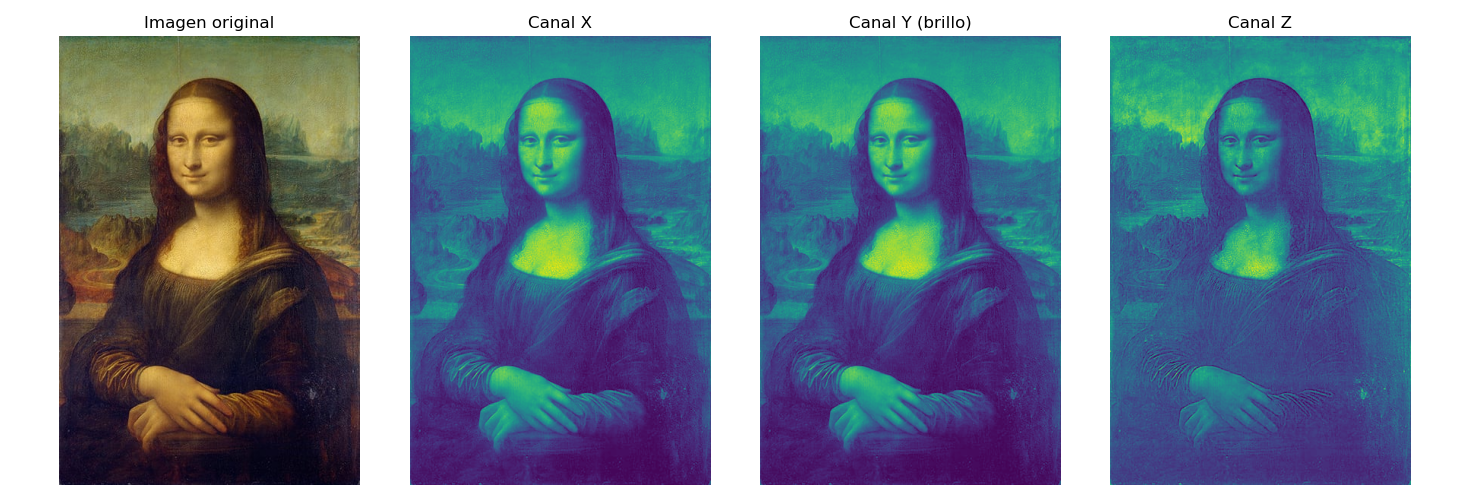

# Código:
El código convierte la imagen al espacio XYZ, muestra cada canal visualmente y calcula estadísticas de color y brillo para analizar la composición luminosa de la imagen.

In [ ]:
def bgr_to_xyz_demo(bgr_img):
    """Conversión a espacio de color XYZ y análisis de canales"""
    xyz_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2XYZ)
    x, y, z = cv2.split(xyz_img)
   
    # Visualización de canales
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    axes[0].imshow(cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Imagen original")
    axes[1].imshow(x, cmap="viridis")
    axes[1].set_title("Canal X")
    axes[2].imshow(y, cmap="viridis")
    axes[2].set_title("Canal Y (brillo)")
    axes[3].imshow(z, cmap="viridis")
    axes[3].set_title("Canal Z")
    for ax in axes:
        ax.axis("off")
    plt.tight_layout()
    plt.show()
   
    # Estadísticas de los canales
    print("Estadísticas de los canales XYZ:")
    print(f"Canal X: media={x.mean():.2f}, desviación estándar={x.std():.2f}")
    print(f"Canal Y: media={y.mean():.2f}, desviación estándar={y.std():.2f}")
    print(f"Canal Z: media={z.mean():.2f}, desviación estándar={z.std():.2f}")
 
bgr_to_xyz_demo(bgr_img)

## Histogramas:
* Se analizó la distribución de intensidades de los canales.
* Se comparó cómo varían esas distribuciones entre distintos espacios de color.
* Se facilitaron tareas de mejora, segmentación o análisis visual de la imagen.

## Ejemplos:

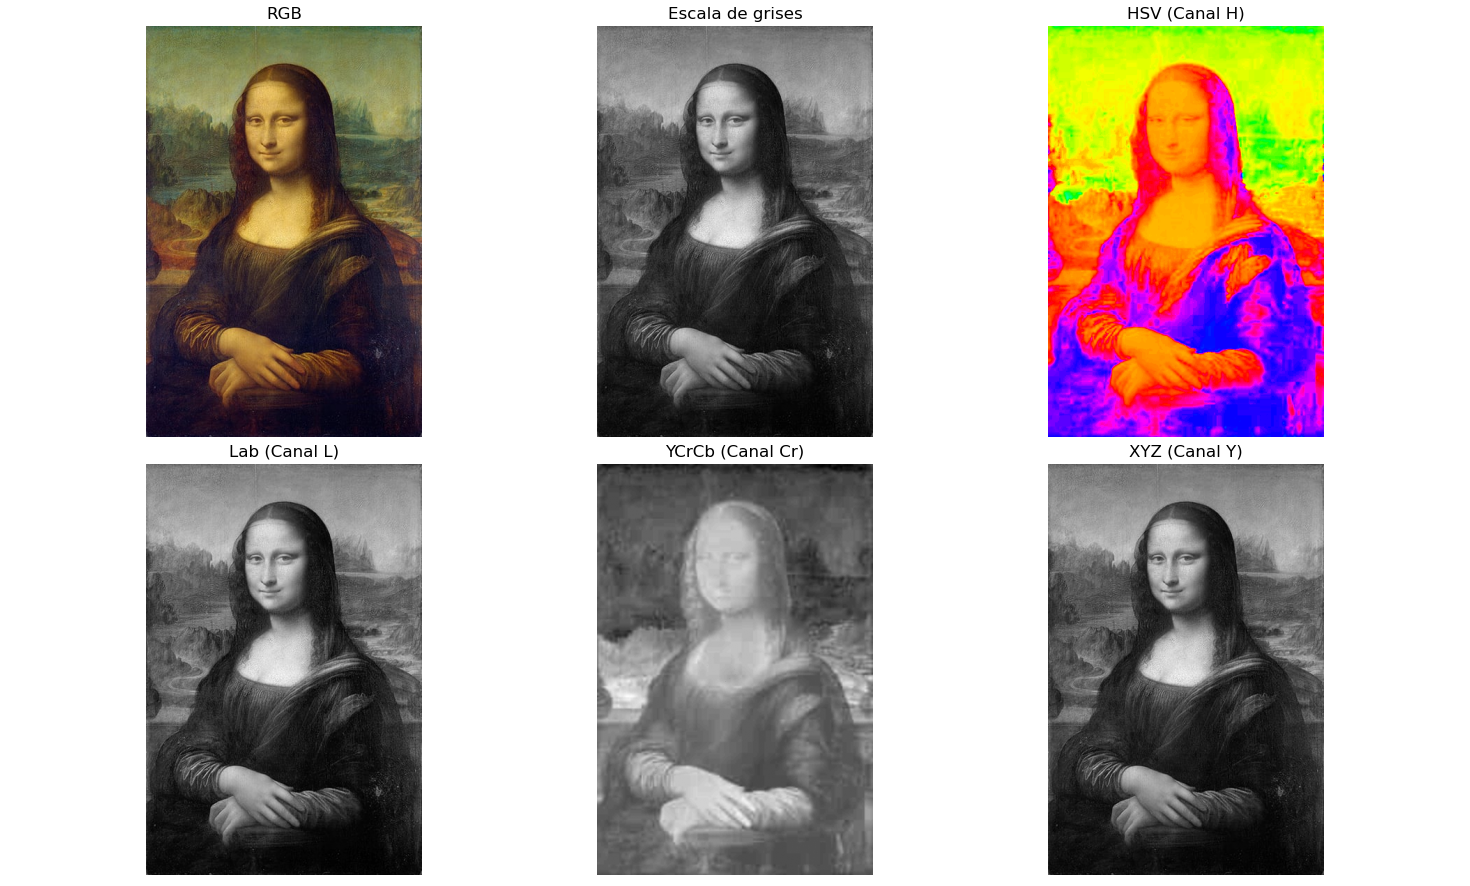

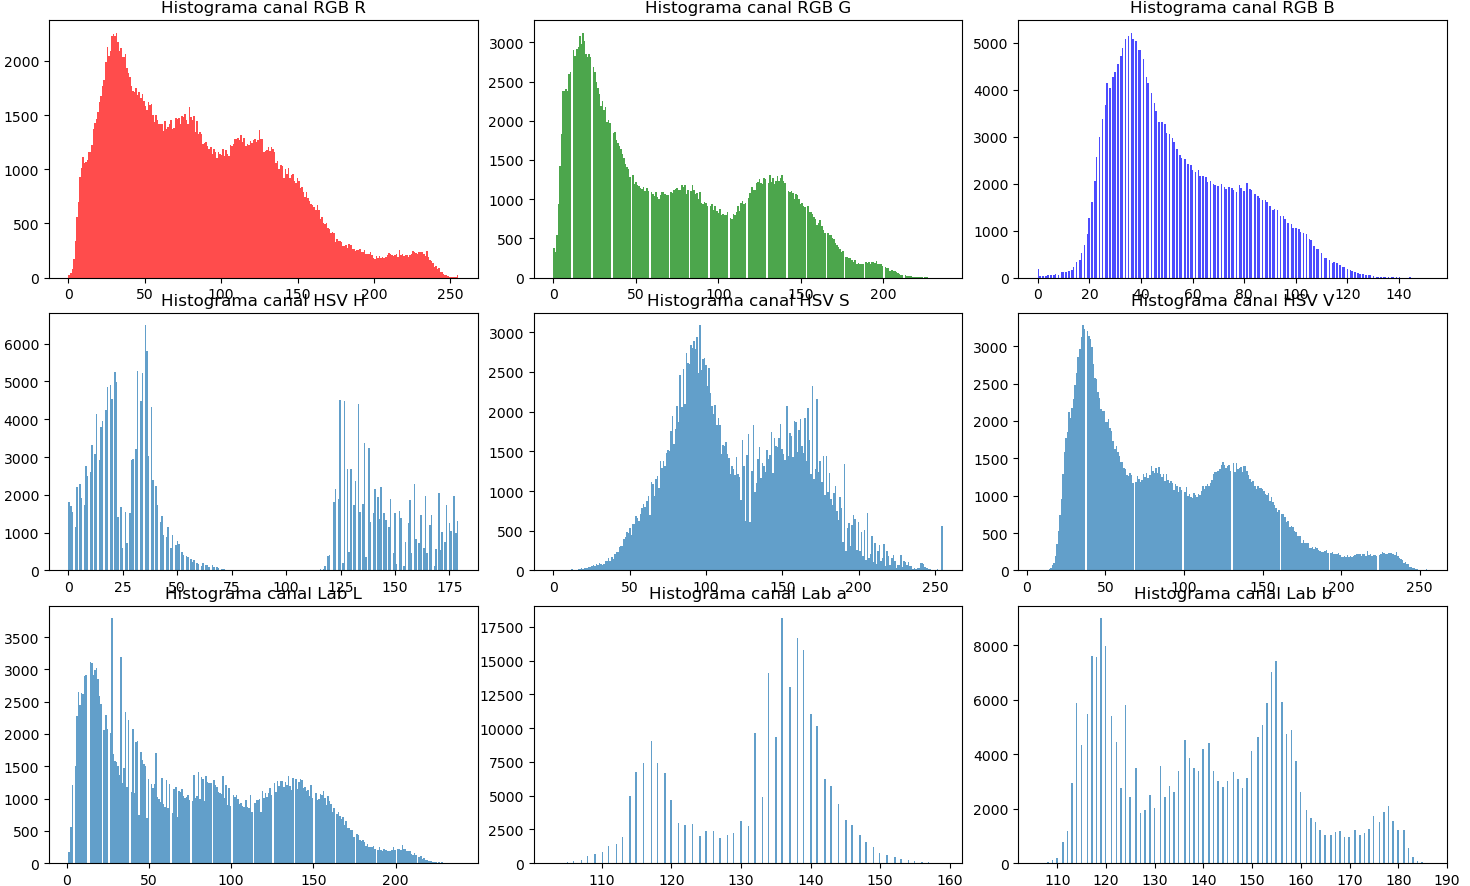

# Código:
compare_color_spaces() → muestra cómo cambia la imagen según el modelo de color.
plot_channel_histograms() → muestra cómo se distribuyen los valores de cada canal en esos modelos.

In [ ]:
def compare_color_spaces(bgr_img):
    """Comparación visual de distintos espacios de color"""
    # Convertir a varios espacios de color
    rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
    gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
    hsv_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2HSV)
    lab_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2LAB)
    ycrcb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2YCrCb)
    xyz_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2XYZ)
   
    # Crear cuadrícula de visualización
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes[0,0].imshow(rgb_img)
    axes[0,0].set_title("RGB")
    axes[0,1].imshow(gray_img, cmap="gray")
    axes[0,1].set_title("Escala de grises")
    axes[0,2].imshow(hsv_img[:, :, 0], cmap="hsv")
    axes[0,2].set_title("HSV (Canal H)")
    axes[1,0].imshow(lab_img[:, :, 0], cmap="gray")
    axes[1,0].set_title("Lab (Canal L)")
    axes[1,1].imshow(ycrcb_img[:, :, 1], cmap="gray")
    axes[1,1].set_title("YCrCb (Canal Cr)")
    axes[1,2].imshow(xyz_img[:, :, 1], cmap="gray")
    axes[1,2].set_title("XYZ (Canal Y)")
   
    for ax in axes.flatten():
        ax.axis("off")
    plt.tight_layout()
    plt.show()
 
compare_color_spaces(bgr_img)
 
def plot_channel_histograms(bgr_img):
    """Dibujar los histogramas de los canales de varios espacios de color"""
    # Preparar datos
    rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
    hsv_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2HSV)
    lab_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2LAB)
   
    # Crear figura
    fig, axes = plt.subplots(3, 3, figsize=(18, 15))
   
    # Canales RGB
    r, g, b = cv2.split(rgb_img)
    for i, (channel, color, title) in enumerate(zip([r, g, b], ["red", "green", "blue"], ["R", "G", "B"])):
        axes[0,i].hist(channel.ravel(), bins=256, color=color, alpha=0.7)
        axes[0,i].set_title(f"Histograma canal RGB {title}")
   
    # Canales HSV
    h, s, v = cv2.split(hsv_img)
    for i, (channel, title) in enumerate(zip([h, s, v], ["H", "S", "V"])):
        axes[1,i].hist(channel.ravel(), bins=256, alpha=0.7)
        axes[1,i].set_title(f"Histograma canal HSV {title}")
   
    # Canales Lab
    l, a, b = cv2.split(lab_img)
    for i, (channel, title) in enumerate(zip([l, a, b], ["L", "a", "b"])):
        axes[2,i].hist(channel.ravel(), bins=256, alpha=0.7)
        axes[2,i].set_title(f"Histograma canal Lab {title}")
   
    plt.tight_layout()
    plt.show()
 
plot_channel_histograms(bgr_img)